# Отчет по лабораторной работе №5. Численное интегрирование и решение СЛАУ. 
## Выполнил Сарафанов Ф.Г., 430 группа/2018, 19 вариант



## Итерационные методы решения СЛАУ
Решаем систему

$$Ax=b$$ 

Итерационными методами называются приближенные методы, в которых решение системы получается как предел последовательности векторов $\{x^k\}_{k=0}^{\infty}$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальное приближение решения $x^0$ в этой программе выбирается как столбец свободных членов $b$.

Последовательность $\{x^k\}_{k=0}^{\infty}$ называется итерационной, а её элементы последовательными итерациями (приближениями).

Важной характеристикой итерационного процесса является скорость схожимости итерационной последовательности. Говорят, что итерация $x^k$ является с точностью $\varepsilon$ приближенным решением системы, если

$$||x^k-x^0||<\varepsilon,$$

где $x^0$- точное решение системы.

Как правило, для итерационного метода решения системы существует такая последовательность невырожденных матриц $H_k$, $k=1,2\dots$, что правило построения элементов итерационной последовательности записывается в виде:

$$x^{k+1}=T_kx^k+H_kb$$

Вектор $\varphi^k=x^k-x^0$ называется вектором ошибки, а вектор $r^k=Ax^k=b$ - вектором невязки.

Итерационный метод называется стационарным, если матрица $H_k$ не зависит от номера шага k.  В противном случае метод называется нестационарным. Для того, чтобы стационарный итерационный процесс

$$x^{k+1}=Tx^k+Hb$$

сходился, достаточно, чтобы ля какой-либо одной нормы матрицы $T$ выполнялось неравенство

$$||T||<1.$$

## Метод последовательных приближений

В данном методе $H_k=E$, $T_k=A-E\equiv\alpha$, или если задать систему уравнений сразу в виде

$$x=\alpha\cdot x +\beta,$$

то итерационный процесс записывается в первичных обозначениях:

$$x^{k+1}=\alpha x^k+\beta$$

В программе выполняется достаточное условие сходимости итерационного процесса 

$$||T||\equiv||\alpha||<1$$

## Постановка задачи

Дана система уравнений 

$$n^3x_i=\sum\limits_{j=1}^n \frac{j^2+\sin^2 j}{\ln(1+i+j)}x_j+\int\limits_1^3 \ln(\ln(10+i+\cos(t))) dt$$

где $i=1\ldots10000$.

1. Вычислить столбец правой части -- определенных интегралов рекуррентным методом трапеций с относительной точностью 0,01.

2. Для  i=2 построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации используемого метода численного интегрирования.

4. График зависимости свободных членов системы от i.

5. Решение систему уравнений заданным методом последовательных приближений для числа уравнений вплоть до 10000  с относительной точностью 0,001. 

6. Число обусловленности линейной системы.

6. Построить график решения от i, график зависимости невязки от i,а также график зависимости нормы решения от номера итерации.

Импорт библиотек

In [17]:
from numpy import cos,sin,pi,log,sort,inf,linspace,abs,sum,append,array
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import time

Зададим условия расчетов:

In [18]:
a,b=1,3 # Пределы интегрирования определенного интеграла
inteps=0.01 # Относительная погрешность расчета интеграла
eps=0.001 # Условие сходимости |xk-xkk|<eps
n=1000

Задаем формулы для системы уравнений:

In [19]:
def F(i,t):
	return log(log(10+i+cos(t)))

def coeff(i,j):
	return (j**2+sin(j)**2)/log(1+j+i)

def sila(i):
	def Fi(t):
		return F(i,t)
	return trapz(Fi,a,b,inteps)

Реализуем отображение процесса заполнения матрицы, так как процесс может быть долгим, разумно знать его готовность

In [20]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
    if iteration == total: 
        print()

Реализация реккурентного вычисления определенного собственного интеграла методом трапеций:

In [21]:
trap=[]
trapf=[]
def trapz (f,a,b,eps,integ0=inf,S=[],it=0,plot=False):
	if len(S)==0:
		S=linspace(a,b,3)
	h=S[1]-S[0]
	integ=sum([(f(S[i])+f(S[i+1]))/2*h for i in range(0,len(S)-1)])
	if abs((integ-integ0)/integ)>eps:

		Snew=S
		for i in range(0,len(S)-1):
			Snew=append(Snew,(S[i+1]+S[i])/2)
		Snew=sort(Snew)
		if plot:
			trap.append(it)
			trapf.append(integ)
		return trapz(f,a,b,eps,integ0=integ,S=Snew,it=it+1,plot=plot)
	else:
		if plot==True:
			plt.title('Значение интеграла от номера итерации при i=2')
			plt.plot(trap,trapf,'o-')
			plt.show()
		return integ

Для больших вычислений время расчета матрицы превышает время поиска решения, и для экономии времени при повторных расчетах будем кэшировать результаты на диск

In [22]:
start_time = time.time()
try:
    alpha=np.load('data/alpha_arr_n'+str(n)+'.npy')
    beta=np.load('data/beta_arr_n'+str(n)+'.npy')
    x1=np.load('data/x_arr_n'+str(n)+'.npy')
except:
    
    beta=np.zeros(n,dtype=np.float32)
    
    for i in range(1,n+1):
#         printProgressBar(i, n, prefix = 'Расчет beta: ', suffix = 'Готово', length = 50)
#         time.sleep(0.02)
        beta[i-1]=sila(i)/(n**3-coeff(i,i))
    
    t0= time.time()
    A=np.zeros([n,n], dtype=np.float32)

    for i in range(1,n+1):
        printProgressBar(i, n, prefix = 'Расчет alpha:', suffix = 'Готово', length = 50)
        ii=coeff(i,i)
        for j in range(1,n+1):
            if i==j:
                A[i-1][j-1]=0
            else:
                A[i-1][j-1]=coeff(i,j)/(n**3-ii)
    t1= time.time()

    print('Приступаю к расчету решения встроенной функцией')
    E=np.identity(n)
    x1=np.linalg.solve(E-A, beta)
    t2= time.time()
    np.save('data/alpha_arr_n'+str(n),A)
    np.save('data/beta_arr_n'+str(n),beta)
    np.save('data/x_arr_n'+str(n),x1)
    print('Время работы %s с'%(t2-t0))
try:
    alpha=np.load('data/alpha_arr_n'+str(n)+'.npy')
    beta=np.load('data/beta_arr_n'+str(n)+'.npy')
    x1=np.load('data/x_arr_n'+str(n)+'.npy')
    print('Матрицы загружены!')
except:
    print('Автоматическая генерация не сработала... Все точно в порядке?')
    if 1!=1:
        print('Нет! Все совсем не в порядке!')
        import sys
        sys.exit() 

Матрицы загружены!


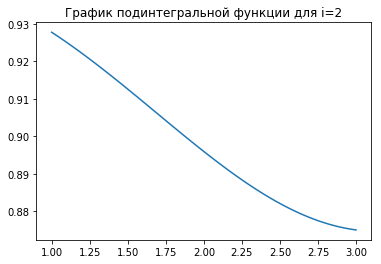

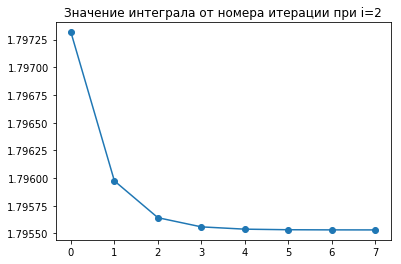

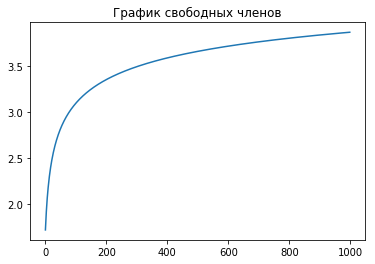

In [23]:
def f(t):
	return F(2,t)

plt.title('График подинтегральной функции для i=2')
plt.plot(linspace(a,b,100),f(linspace(a,b,100)))
plt.show()

trapz(f,a,b,inteps/100000,plot=True)

B=array([sila(i) for i in range(1,n)])
plt.title('График свободных членов')
plt.plot(B,'-')
plt.show()

Условия сходимости выполнены


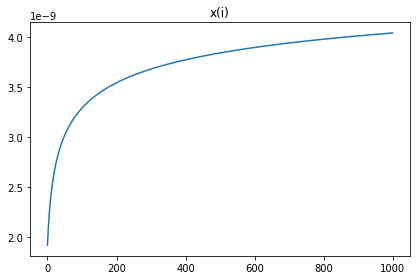

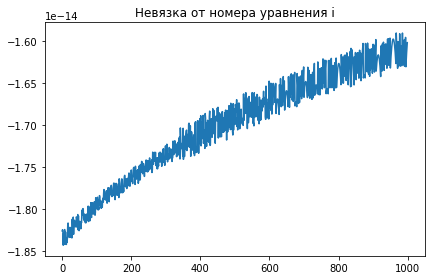

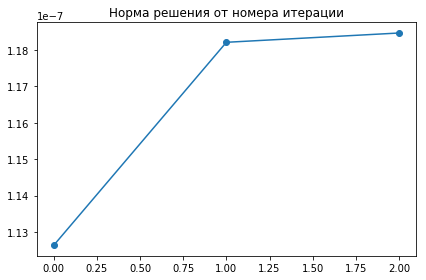

Количество итераций 3
Норма решения 1.18475654e-07, норма решения встроенной функцией 1.1847621392779483e-07
Число обусловленности 1.0659104000052135


In [24]:
if np.linalg.norm(alpha,ord=1)<1:
	print('Условия сходимости выполнены')

Xk=beta
Xkk=np.ones(n)*10e9
E=np.identity(n)

t1=time.time() - start_time

N=0
norms=[]
while np.linalg.norm(Xk-Xkk)/np.linalg.norm(Xkk)>eps:
    N+=1
    norms.append(np.linalg.norm(Xk))
    Xkk=Xk
    Xk=alpha@Xkk+beta

r=(E-alpha)@Xk-beta

plt.title('x(i)')
plt.tight_layout()
plt.plot(Xk,'-')
plt.show()

plt.title('Невязка от номера уравнения i')
plt.tight_layout()
plt.plot(r,'-')
plt.show()

plt.title('Норма решения от номера итерации')
plt.tight_layout()
plt.plot(norms,'-o')
plt.show()
print('Количество итераций %s'%N)
print('Норма решения %s, норма решения встроенной функцией %s'%(np.linalg.norm(Xk), np.linalg.norm(x1)))
if n<=10**3:
    print('Число обусловленности',np.linalg.cond(E-alpha))

$$
\begin{cases}
1\\
2\\
3\\
\end{cases},\qquad i=2,3,\ldots, n
$$